In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit # to get even classes in the test split
from sklearn.model_selection import train_test_split
from LinearRegression import LinearRegression


In [2]:
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X, y = iris.data, iris.target

# Use StratifiedShuffleSplit to select 10% of the data with an even split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_subset, y_subset = X[test_index], y[test_index]

# Now, X_subset and y_subset contain the randomly selected 10% of the Iris dataset with an even split of each class


In [4]:
X_subset,y_subset

(array([[6.6, 2.9, 4.6, 1.3],
        [6.1, 2.6, 5.6, 1.4],
        [6.5, 3. , 5.2, 2. ],
        [5.6, 2.5, 3.9, 1.1],
        [7.3, 2.9, 6.3, 1.8],
        [4.4, 3.2, 1.3, 0.2],
        [4.4, 3. , 1.3, 0.2],
        [5. , 3.4, 1.5, 0.2],
        [6.4, 2.8, 5.6, 2.2],
        [6.6, 3. , 4.4, 1.4],
        [5.8, 4. , 1.2, 0.2],
        [6.5, 3. , 5.5, 1.8],
        [6.4, 3.2, 4.5, 1.5],
        [6.7, 3. , 5. , 1.7],
        [5.2, 3.4, 1.4, 0.2]]),
 array([1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0]))

In [5]:
# loading saved model file 
with open('reg_model_1.pkl', 'rb') as f:
    model = pickle.load(f)

In [14]:
y_prediction=model.predict(X_subset[:,3])
y_prediction

array([0.71829248, 0.76678204, 1.0577194 , 0.62131336, 0.96074028,
       0.18490733, 0.18490733, 0.18490733, 1.15469852, 0.76678204,
       0.18490733, 0.96074028, 0.8152716 , 0.91225072, 0.18490733])

In [15]:
# Mean square error
print("MSE is",model.score(X_subset[:,3], y_subset) )
      

MSE is 0.3848871208193546


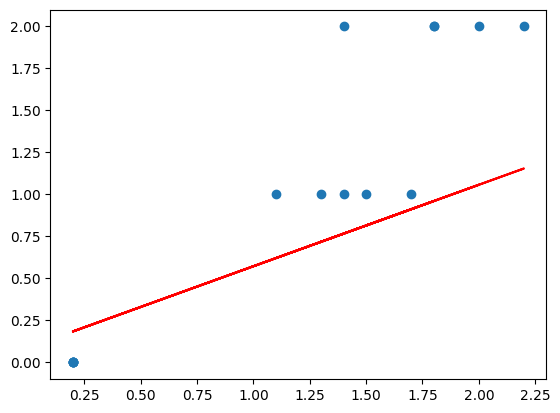

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_subset[:,3], y_subset)
# ax.scatter(model_1_X_test, y)
ax.plot(X_subset[:,3], y_prediction, c='r')